<a href="https://colab.research.google.com/github/kitodev/ANPR/blob/main/ANPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and Inport Dependencies

In [68]:
!pip install easyocr
!pip install imutils

In [112]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr





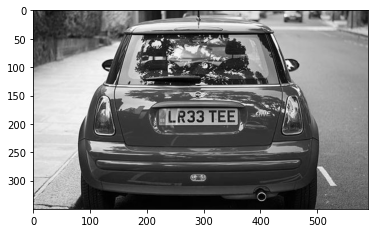

In [113]:
img = cv2.imread('eng.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# Add filter and find edges

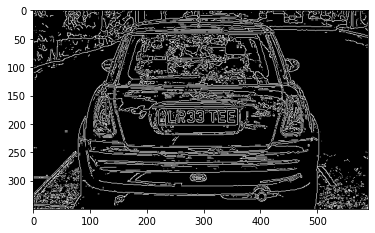

In [114]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 30)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

Find contours apply mask

In [115]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [116]:
location = None

for contour in contours:
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

In [117]:
location

array([[[221, 177]],

       [[222, 202]],

       [[360, 201]],

       [[359, 173]]], dtype=int32)

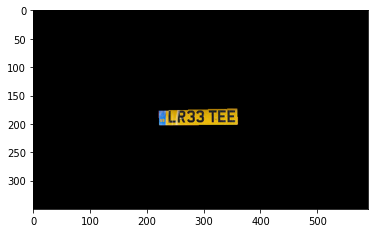

In [118]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

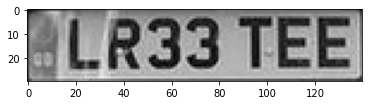

In [119]:
(x, y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))

cropped_image = gray[x1:x2+1, y1:y2+1]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [120]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [140, 0], [140, 30], [0, 30]], 'HLR33 TEE', 0.06523533910512924)]

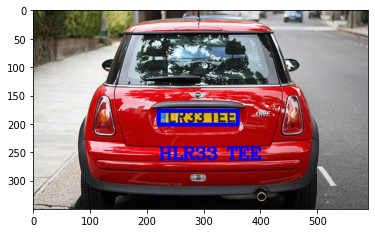

In [124]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_COMPLEX
res = cv2.putText(img, text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(255, 0, 0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (255, 0, 0),2)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_RGB2BGR))